In [95]:
pip install matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [96]:
import matplotlib.pyplot as plt
%matplotlib inline


In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

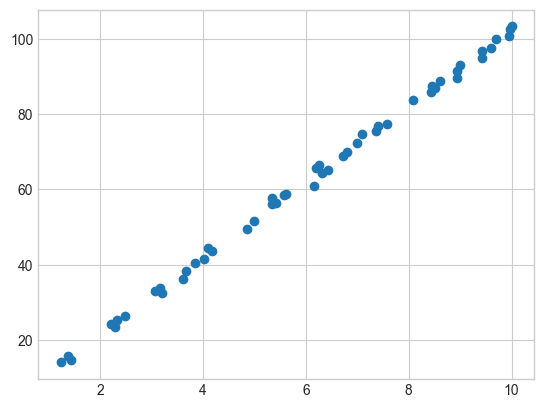

In [98]:
rng = np.random.RandomState(24)
x = 10 * rng.rand(50)
y = 10 * x + 2 + rng.randn(50)
plt.scatter(x, y);

In [99]:
!pip install scikit-learn


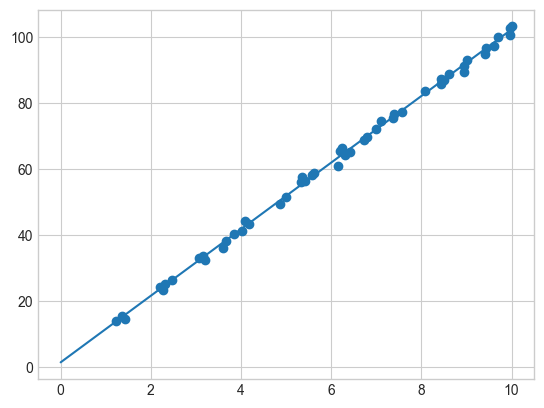

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000) # the o represents where the line will start on the x axix.
# the 10 represents where the line will go to, e.g if set to 1 the line will go to the 1 on the x axis.
# 
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [101]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     10.08215472005299
Model intercept: 1.4901336150297553


In [102]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


In [103]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4, 6, 7, 8,])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])
# this gets the values in the form of powers, power from 1 -3

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  6.,  36., 216.],
       [  7.,  49., 343.],
       [  8.,  64., 512.]])

In [104]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

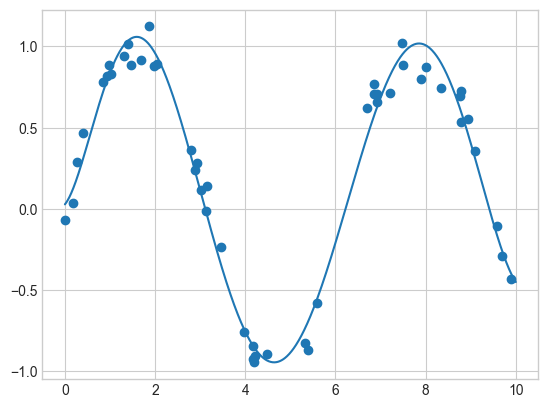

In [105]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

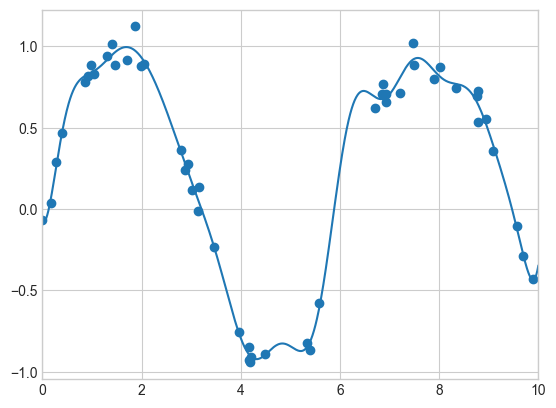

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

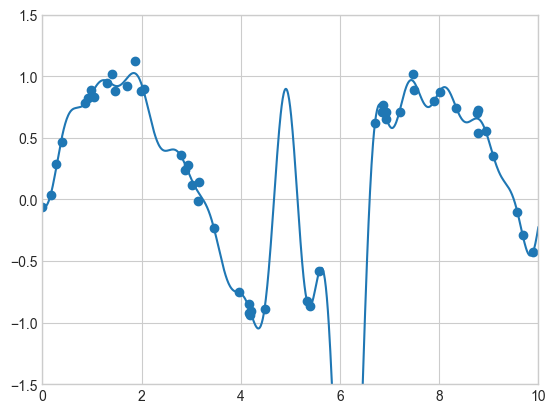

In [107]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

In [108]:
# url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/main'
# !curl -O {url}/FremontBridge.csv
# !curl -O {url}/SeattleWeather.csv

In [109]:
import pandas as pd


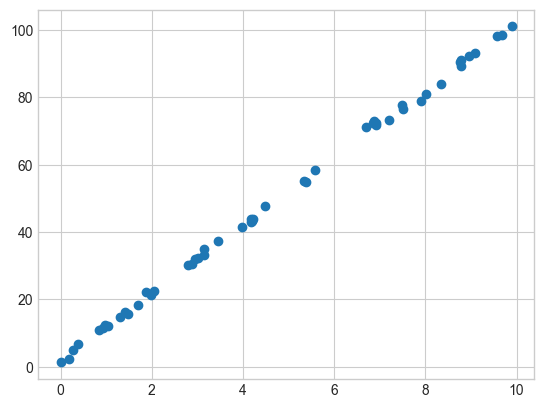

In [110]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 10 * x + 2 + rng.randn(50)
plt.scatter(x, y);

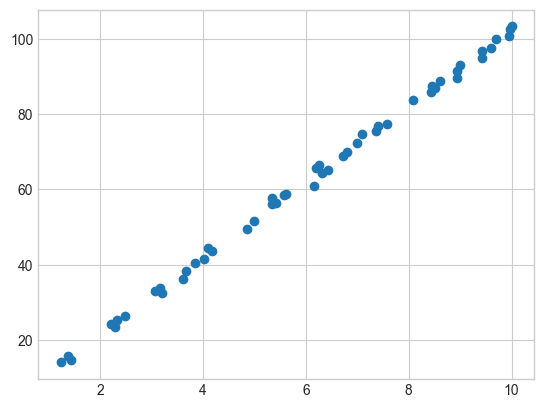

In [111]:
rng = np.random.RandomState(24)
x = 10 * rng.rand(50)
y = 10 * x + 2 + rng.randn(50)
plt.scatter(x, y);

In [112]:
df = pd.read_csv('Test.csv')


In [113]:
print(df)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

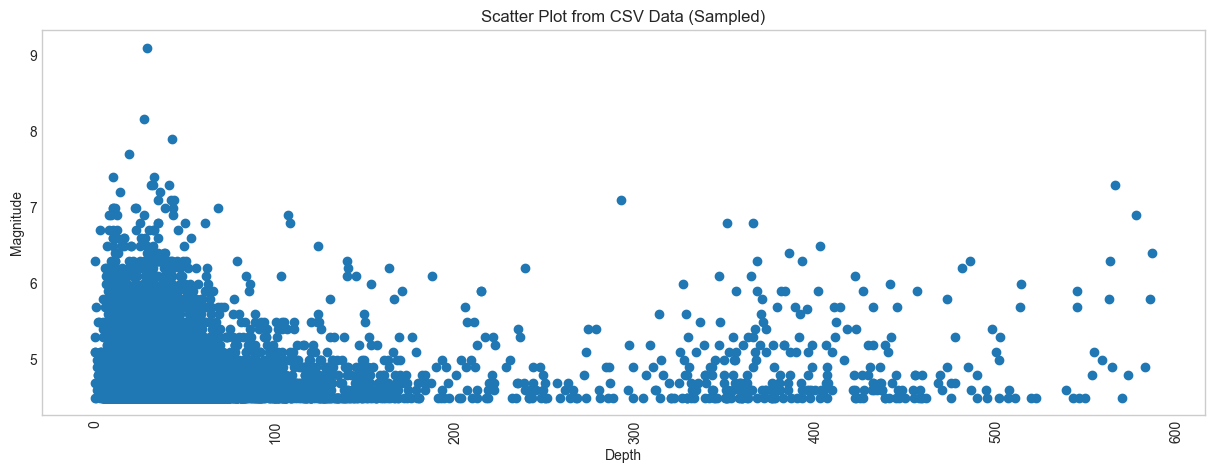

In [114]:
sample_data = pd.read_csv('japan_2000_2023_query.csv')
x = sample_data['depth']
y = sample_data['mag']

plt.figure(figsize=(15, 5))
plt.scatter(x, y)
xfit = np.linspace(0, 10, 1000) # the o represents where the line will start on the x axix.
plt.title('Scatter Plot from CSV Data (Sampled)')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [115]:
import pandas as pd
df = pd.read_csv('train.csv')

if 'Survived' in df.columns and 'Pclass' in df.columns:
    survival_stats = df.groupby('Pclass')['Survived'].agg(['mean', 'count']).reset_index()
    
    survival_stats['Survival Percentage'] = survival_stats['mean'] * 100
    
    survival_stats = survival_stats.drop(columns=['mean'])
    
    print(survival_stats)
else:
    print("Columns 'Survived' or 'Pclass' not found in the DataFrame.")


   Pclass  count  Survival Percentage
0       1    216            62.962963
1       2    184            47.282609
2       3    491            24.236253


C:\Users\Luka Brennan\AppData\Local\Temp\ipykernel_49860\3198819801.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_stats = df.groupby('Age Group')['Survived'].agg(['mean', 'count']).reset_index() # Groups the Age Group to calculate the average


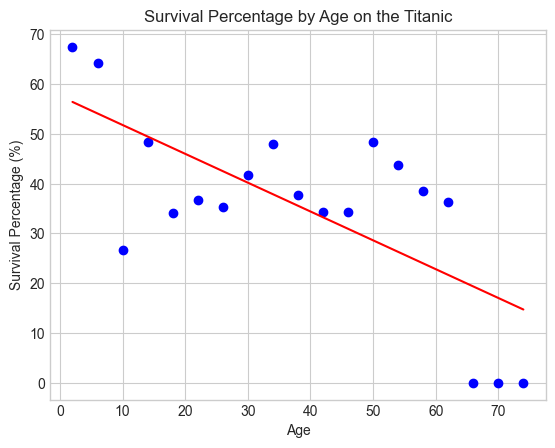

In [116]:
#Imports
# Can also add Pclass to this as you can have more than just 2 input from csv. 
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore

df = pd.read_csv('train.csv')

df = df.dropna(subset=['Age', 'Survived']) # Drops any data inside of Age or Survied that is empty
    
agerange = np.arange(0,80,4) # Creates a age range array where 0 is the start and 80 is the end, 4 is how much it is incremented 

df['Age Group'] = pd.cut(df['Age'], bins=agerange) # Creates a "Age Group" coloumn which contains the age for each person

survival_stats = df.groupby('Age Group')['Survived'].agg(['mean', 'count']).reset_index() # Groups the Age Group to calculate the average
    
survival_stats['Survival Percentage'] = survival_stats['mean'] * 100 # Calculates the percentage    

survival_stats['Age Midpoint'] = survival_stats['Age Group'].apply(lambda x: x.mid) # Uses the Midpoints of the Age Groups using the "mid" attribute

X = survival_stats[['Age Midpoint']] 
y = survival_stats['Survival Percentage']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X) # Predicate the survival percentage

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
#plt.plot(X, y, color='red', linewidth=2)

plt.title('Survival Percentage by Age on the Titanic')
plt.xlabel('Age')
plt.ylabel('Survival Percentage (%)')
plt.grid(True)
plt.show()

In [117]:
# Imports
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
from sklearn.linear_model import LinearRegression  # type: ignore
from sklearn.preprocessing import OneHotEncoder  # type: ignore

# Load the dataset
df = pd.read_csv('train.csv')

# Drop rows where Age or Survived is NaN
df = df.dropna(subset=['Age', 'Survived'])

# Create age bins
agerange = np.arange(0, 80, 4)  # Age range in increments of 4 years
df['Age Group'] = pd.cut(df['Age'], bins=agerange)

# Group by Age Group and Pclass to calculate survival stats
survival_stats = df.groupby(['Age Group', 'Pclass'])['Survived'].agg(['mean', 'count']).reset_index()

# Calculate survival percentage
survival_stats['Survival Percentage'] = survival_stats['mean'] * 100

# Get midpoints of age groups
survival_stats['Age Midpoint'] = survival_stats['Age Group'].apply(lambda x: x.mid)

# Prepare the data
X = survival_stats[['Age Midpoint', 'Pclass']]  # Independent variables
y = survival_stats['Survival Percentage']  # Dependent variable

# One-hot encode the categorical feature (Pclass)
encoder = OneHotEncoder(drop='first')  # Avoid dummy variable trap
X_encoded = encoder.fit_transform(X[['Pclass']]).toarray()  # Fit and transform Pclass, convert to array

# Combine age midpoints with the one-hot encoded Pclass
X_final = np.concatenate([X[['Age Midpoint']].values, X_encoded], axis=1)

# Create and fit the model
model = LinearRegression()
model.fit(X_final, y)

# Predict the survival percentage using the model
y_pred = model.predict(X_final)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(X['Age Midpoint'], y, color='blue', label='Actual Survival Percentage', s=100)
plt.scatter(X['Age Midpoint'], y_pred, color='red', label='Predicted Survival Percentage', s=50, alpha=0.5)

# Adding titles and labels
plt.title('Survival Percentage by Age and Pclass on the Titanic')
plt.xlabel('Age')
plt.ylabel('Survival Percentage (%)')
plt.ylim(0, 100)  # Limit y-axis from 0 to 100%
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Luka Brennan\AppData\Local\Temp\ipykernel_49860\3115789744.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_stats = df.groupby(['Age Group', 'Pclass'])['Survived'].agg(['mean', 'count']).reset_index()


ValueError: Input y contains NaN.

In [23]:
import pandas as pd
dataset = pd.read_csv('Property_Price_Register_Ireland-28-05-2021.csv')

#Kilkenny = df[df['COUNTY'] == 'Kilkenny']
#Kilkenny = Kilkenny.dropna(subset=['POSTAL_CODE', 'PROPERTY_DESC', 'PROPERTY_SIZE_DESC'])
#print(Kilkenny.head())
# Load the dataset
dataset = pd.read_csv('Property_Price_Register_Ireland-28-05-2021.csv')

# Print the column names to check the actual name of the 'COUNTY' column
print(dataset.columns)

Index(['SALE_DATE', 'ADDRESS', 'POSTAL_CODE', 'COUNTY', 'SALE_PRICE',
       'IF_MARKET_PRICE', 'IF_VAT_EXCLUDED', 'PROPERTY_DESC',
       'PROPERTY_SIZE_DESC'],
      dtype='object')


In [24]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# # Load the dataset into a DataFrame
# dataset = pd.read_csv('Property_Price_Register_Ireland-28-05-2021.csv')

# # Filter the data for Kilkenny
# kilkenny_data = dataset[dataset['COUNTY'] == 'Kilkenny']

# # Drop rows with missing SALE_PRICE
# kilkenny_data = kilkenny_data.dropna(subset=['SALE_PRICE'])

# # Selecting features (you can modify based on relevance)
# # Here, we'll use 'IF_MARKET_PRICE', 'IF_VAT_EXCLUDED' as independent variables for the prediction.
# X = kilkenny_data[['IF_MARKET_PRICE', 'IF_VAT_EXCLUDED']]
# y = kilkenny_data['SALE_PRICE']

# # Split the data into training and testing sets (optional)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions (on the test set or new data)
# predictions = model.predict(X_test)

# # Evaluate the model
# print(f"Model slope (coefficients): {model.coef_}")
# print(f"Model intercept: {model.intercept_}")

# # Example prediction on the first test sample
# print(f"Predicted sale price for the first test sample: {predictions[0]}")
# print(f"Actual sale price: {y_test.iloc[0]}")


In [25]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# # Load the dataset into a DataFrame
# dataset = pd.read_csv('Property_Price_Register_Ireland-28-05-2021.csv')

# # Filter the data for Kilkenny
# kilkenny_data = dataset[dataset['COUNTY'] == 'Kilkenny']

# # Drop rows with missing SALE_PRICE or SALE_DATE
# kilkenny_data = kilkenny_data.dropna(subset=['SALE_PRICE', 'SALE_DATE'])

# # Convert SALE_DATE to datetime format, and handle invalid date formats by forcing errors to 'NaT' (Not a Time)
# kilkenny_data['SALE_DATE'] = pd.to_datetime(kilkenny_data['SALE_DATE'], format='%d/%m/%Y', errors='coerce')

# # Drop rows where date conversion failed (NaT values)
# kilkenny_data = kilkenny_data.dropna(subset=['SALE_DATE'])

# # Convert SALE_DATE to numeric (number of days since the first sale date)
# kilkenny_data['DAYS_SINCE_FIRST'] = (kilkenny_data['SALE_DATE'] - kilkenny_data['SALE_DATE'].min()).dt.days

# # Select the features (DAYS_SINCE_FIRST) and target (SALE_PRICE)
# X = kilkenny_data[['DAYS_SINCE_FIRST']]  # Feature: number of days since the first sale
# y = kilkenny_data['SALE_PRICE']          # Target: sale price

# # Optionally reduce the data sample (let's take 100 random samples for simpler visualization)
# kilkenny_data_sampled = kilkenny_data.sample(n=100, random_state=42)

# # Update the sampled X and y for training/testing
# X_sampled = kilkenny_data_sampled[['DAYS_SINCE_FIRST']]
# y_sampled = kilkenny_data_sampled['SALE_PRICE']

# # Split the sampled data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# # Create and train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Plotting the actual vs predicted prices
# plt.figure(figsize=(10, 6))

# # Plot the actual SALE_PRICE vs DAYS_SINCE_FIRST
# plt.scatter(X_test, y_test, color='blue', label='Actual Prices')

# # Plot the predicted SALE_PRICE vs DAYS_SINCE_FIRST
# plt.scatter(X_test, predictions, color='green', label='Predicted Prices')

# # Plot the regression line (based on the model predictions)
# plt.plot(X_test, predictions, color='red', label='Regression Line')

# # Add labels and title
# plt.xlabel('Days Since First Sale')
# plt.ylabel('Sale Price (€)')
# plt.title('Actual vs Predicted House Prices in Kilkenny')

# # Show the plot with the legend
# plt.legend()
# plt.grid(True)
# plt.show()

# # Optional: Display the model coefficients
# print(f"Model slope (Days_Since_First -> Price): {model.coef_[0]}")
# print(f"Model intercept: {model.intercept_}")
